In [2]:
import pandas                   as pd
import numpy                    as np
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import seaborn                  as sb
from   sklearn                  import preprocessing 
from   sklearn.model_selection  import train_test_split
from   sklearn                  import svm
from   sklearn.metrics          import classification_report, confusion_matrix
import itertools
from   sklearn.tree             import DecisionTreeClassifier
from   sklearn                  import metrics
import xgboost                  as xgb
from   sklearn.model_selection  import KFold
from   sklearn.model_selection  import cross_val_score
from   sklearn.model_selection  import cross_val_predict
from   sklearn.model_selection  import validation_curve
from   sklearn                  import tree

from   sklearn.model_selection  import learning_curve
from   sklearn.linear_model     import LogisticRegression
from   sklearn.ensemble         import RandomForestClassifier
from numpy                      import loadtxt
from   mlxtend.feature_selection import SequentialFeatureSelector as SFS
from   sklearn.linear_model     import LogisticRegression
from   sklearn.mixture          import GaussianMixture
from   sklearn.random_projection import GaussianRandomProjection as GRP
import random 

In [299]:
RawDataFrame=pd.read_csv('Tumor Cancer Prediction_Data.csv')
RawDataFrame.head()


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,1,0.008043,10.05,17.53,64.41,0.02100,0.10070,0.1402,0.07326,0.02511,...,16.85,0.007803,0.1055,0.002778,11.16,26.84,71.98,310.8,0.06499,B
1,2,0.010450,10.80,21.98,68.79,0.01844,0.08801,0.1303,0.05743,0.03614,...,20.20,0.006543,0.1927,0.002690,12.76,32.04,83.69,359.9,0.07485,B
2,3,0.008747,16.14,14.86,104.30,0.01500,0.09495,0.1206,0.08501,0.05500,...,21.83,0.003958,0.2310,0.001621,17.71,19.58,115.90,800.0,0.11290,B
3,4,0.015190,12.18,17.84,77.79,0.02220,0.10450,0.1140,0.07057,0.02490,...,24.44,0.005433,0.0498,0.003408,12.83,20.92,82.14,451.1,0.05882,B
4,5,0.004551,12.25,22.44,78.18,0.01608,0.08192,0.1256,0.05200,0.01714,...,18.04,0.005096,0.1230,0.002399,14.17,31.99,92.74,466.5,0.06335,B


In [300]:
RawDataFrame.drop('Index', axis=1, inplace=True)

In [301]:
RawDataFrame.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,0.008043,10.05,17.53,64.41,0.02100,0.10070,0.1402,0.07326,0.02511,0.01690,...,16.85,0.007803,0.1055,0.002778,11.16,26.84,71.98,310.8,0.06499,B
1,0.010450,10.80,21.98,68.79,0.01844,0.08801,0.1303,0.05743,0.03614,0.02991,...,20.20,0.006543,0.1927,0.002690,12.76,32.04,83.69,359.9,0.07485,B
2,0.008747,16.14,14.86,104.30,0.01500,0.09495,0.1206,0.08501,0.05500,0.01831,...,21.83,0.003958,0.2310,0.001621,17.71,19.58,115.90,800.0,0.11290,B
3,0.015190,12.18,17.84,77.79,0.02220,0.10450,0.1140,0.07057,0.02490,0.01131,...,24.44,0.005433,0.0498,0.003408,12.83,20.92,82.14,451.1,0.05882,B
4,0.004551,12.25,22.44,78.18,0.01608,0.08192,0.1256,0.05200,0.01714,0.00941,...,18.04,0.005096,0.1230,0.002399,14.17,31.99,92.74,466.5,0.06335,B


In [302]:
RawDataFrame['diagnosis'] = RawDataFrame['diagnosis'].replace(to_replace=['M', 'B'], value=[1,0])
RawDataFrame.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,0.008043,10.05,17.53,64.41,0.02100,0.10070,0.1402,0.07326,0.02511,0.01690,...,16.85,0.007803,0.1055,0.002778,11.16,26.84,71.98,310.8,0.06499,0
1,0.010450,10.80,21.98,68.79,0.01844,0.08801,0.1303,0.05743,0.03614,0.02991,...,20.20,0.006543,0.1927,0.002690,12.76,32.04,83.69,359.9,0.07485,0
2,0.008747,16.14,14.86,104.30,0.01500,0.09495,0.1206,0.08501,0.05500,0.01831,...,21.83,0.003958,0.2310,0.001621,17.71,19.58,115.90,800.0,0.11290,0
3,0.015190,12.18,17.84,77.79,0.02220,0.10450,0.1140,0.07057,0.02490,0.01131,...,24.44,0.005433,0.0498,0.003408,12.83,20.92,82.14,451.1,0.05882,0
4,0.004551,12.25,22.44,78.18,0.01608,0.08192,0.1256,0.05200,0.01714,0.00941,...,18.04,0.005096,0.1230,0.002399,14.17,31.99,92.74,466.5,0.06335,0


In [303]:
RawDataFrame[RawDataFrame.isnull().any(axis=1)].count()


F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
diagnosis    0
dtype: int64

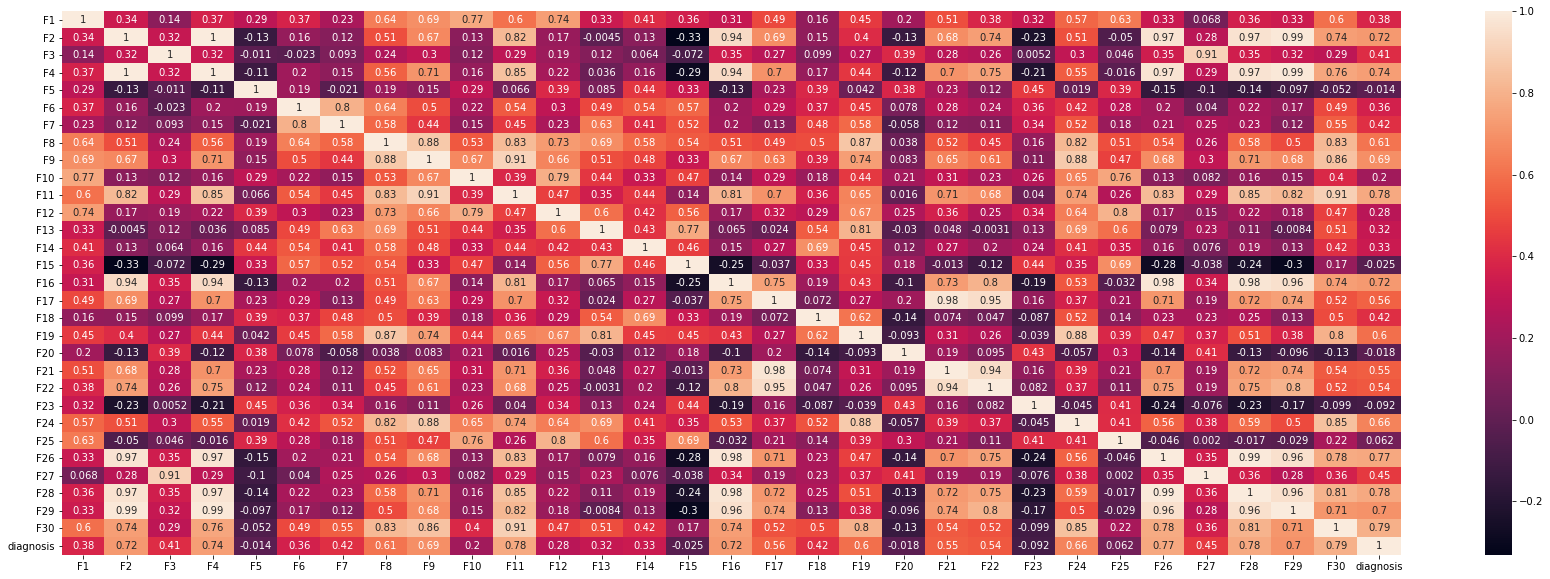

In [304]:
corr=RawDataFrame.corr()
fig, ax=plt.subplots(figsize=(30,10))
sb.heatmap(corr,annot=True,ax=ax)
plt.show()

In [314]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [412]:
input_cols = correlation(RawDataFrame , 0.9)
len(set(input_cols))

10

In [413]:
input_cols = correlation(RawDataFrame , 0.9)
len(set(input_cols))

10

In [414]:
input_cols

{'F11', 'F16', 'F21', 'F22', 'F26', 'F27', 'F28', 'F29', 'F30', 'F4'}

In [415]:
#Final Features selected for computation.
selectedDataFrame=RawDataFrame[['F11',
 'F16',
 'F19',
 'F21',
 'F22',
 'F24',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F4',
 'F9',
'diagnosis']]



In [416]:
selectedDataFrame.info()
#x_train = selectedDataFrame.iloc[:,0:13]
#y_train = selectedDataFrame['diagnosis']
#x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F11        455 non-null    float64
 1   F16        455 non-null    float64
 2   F19        455 non-null    float64
 3   F21        455 non-null    float64
 4   F22        455 non-null    float64
 5   F24        455 non-null    float64
 6   F26        455 non-null    float64
 7   F27        455 non-null    float64
 8   F28        455 non-null    float64
 9   F29        455 non-null    float64
 10  F30        455 non-null    float64
 11  F4         455 non-null    float64
 12  F9         455 non-null    float64
 13  diagnosis  455 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 49.9 KB


In [417]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
names=selectedDataFrame.columns
cancer_norm_df=scale.fit_transform(selectedDataFrame)
cancer_norm_df = pd.DataFrame(cancer_norm_df, columns=names)   


In [418]:
   
cancer_norm_df.describe()


,F11,F16,F19,F21,F22,F24,F26,F27,F28,F29,F30,F4,F9,diagnosis
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.241998,0.171055,0.217881,0.097453,0.061793,0.213651,0.296197,0.360308,0.281993,0.216466,0.394239,0.331893,0.204978,0.362637
std,0.191836,0.144120,0.148547,0.096016,0.089220,0.159455,0.173979,0.162597,0.168680,0.151926,0.225011,0.168012,0.182290,0.481291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.102982,0.080970,0.116871,0.039438,0.019650,0.093091,0.181074,0.239472,0.167962,0.116649,0.223751,0.216364,0.070173,0.000000
50%,0.166054,0.120429,0.179013,0.069029,0.030529,0.182268,0.246176,0.351546,0.232581,0.168950,0.339683,0.291549,0.140933,0.000000
75%,0.368265,0.208243,0.298542,0.118433,0.069503,0.302037,0.372821,0.461487,0.367498,0.262142,0.553910,0.413655,0.291940,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [419]:
Training_validatingData,TestingData= train_test_split(cancer_norm_df, test_size=0.25, random_state=42)
TrainData,ValidateData=train_test_split(Training_validatingData,test_size=0.5, random_state=42)


In [420]:
ValidateData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 149 to 68
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F11        171 non-null    float64
 1   F16        171 non-null    float64
 2   F19        171 non-null    float64
 3   F21        171 non-null    float64
 4   F22        171 non-null    float64
 5   F24        171 non-null    float64
 6   F26        171 non-null    float64
 7   F27        171 non-null    float64
 8   F28        171 non-null    float64
 9   F29        171 non-null    float64
 10  F30        171 non-null    float64
 11  F4         171 non-null    float64
 12  F9         171 non-null    float64
 13  diagnosis  171 non-null    float64
dtypes: float64(14)
memory usage: 20.0 KB


In [421]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 276 to 147
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F11        170 non-null    float64
 1   F16        170 non-null    float64
 2   F19        170 non-null    float64
 3   F21        170 non-null    float64
 4   F22        170 non-null    float64
 5   F24        170 non-null    float64
 6   F26        170 non-null    float64
 7   F27        170 non-null    float64
 8   F28        170 non-null    float64
 9   F29        170 non-null    float64
 10  F30        170 non-null    float64
 11  F4         170 non-null    float64
 12  F9         170 non-null    float64
 13  diagnosis  170 non-null    float64
dtypes: float64(14)
memory usage: 19.9 KB


In [427]:
TestingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 302 to 131
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F11        114 non-null    float64
 1   F16        114 non-null    float64
 2   F19        114 non-null    float64
 3   F21        114 non-null    float64
 4   F22        114 non-null    float64
 5   F24        114 non-null    float64
 6   F26        114 non-null    float64
 7   F27        114 non-null    float64
 8   F28        114 non-null    float64
 9   F29        114 non-null    float64
 10  F30        114 non-null    float64
 11  F4         114 non-null    float64
 12  F9         114 non-null    float64
 13  diagnosis  114 non-null    float64
dtypes: float64(14)
memory usage: 13.4 KB


In [428]:
input_cols = list(TrainData.columns)[0:-1]
target_col='diagnosis'

In [429]:
train_inputs = TrainData[input_cols].copy()
train_targets = TrainData[target_col].copy()
val_inputs = ValidateData[input_cols].copy()
val_targets = ValidateData[target_col].copy()
test_inputs =TestingData[input_cols].copy()
test_targets = TestingData[target_col].copy()

In [430]:
Logit_model = LogisticRegression()
Logit_model_fit = Logit_model.fit(train_inputs,train_targets)
train_preds = Logit_model_fit.predict(train_inputs)


In [431]:
print("Logistic Model Accuracy on training Data: ", metrics.accuracy_score(train_targets,train_preds))


Logistic Model Accuracy on training Data:  0.9588235294117647


In [432]:
val_preds=Logit_model_fit.predict(val_inputs)

In [436]:
print("Logistic Model Accuracy on validating: ", metrics.accuracy_score(val_targets, val_preds))

Logistic Model Accuracy on validating:  0.9181286549707602


In [434]:
test_preds=Logit_model_fit.predict(test_inputs)

In [437]:
print("Logistic Model Accuracy on testing: ", metrics.accuracy_score(test_targets, test_preds))

Logistic Model Accuracy on testing:  0.9473684210526315
